## Telecom Churn Prediction Case Study

In [88]:
# Import required libraries

#Basic
import pandas as pd
import numpy as np
import missingno as msno

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Warnings
import warnings
warnings.filterwarnings("ignore")

#Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score,accuracy_score


import xgboost as xgb


In [ ]:
# Install xgboost library using below command
# pip install xgboost

In [89]:
# Import datasets and check the shape
train_df = pd.read_csv("train.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(train_df.shape)
print(data_dict.shape)

(69999, 172)
(36, 2)


In [90]:
# Modifying numner of rows and columns options
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)





# Analysing Data

In [91]:
#Analyse top  rows of train dataset
train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [92]:
# Print the name of all columns of train dataset
train_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [93]:
# Analyse data dictionary
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [94]:
# Checking data types of all columns
train_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [95]:
# Checking description of dataset
train_df.describe(include="all")

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

## Data cleaning and missing value treatment

In [96]:
# Checking missing values
missing_data_percent = 100*train_df.isnull().mean()
missing_data_percent

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [97]:
# Dropping columns with missing values more than 50 %
threshold = 0.3 * len(train_df)
train_data = train_df.dropna(thresh=threshold, axis=1)
train_data.shape

(69999, 142)

In [98]:
#  Drop irrelevant columns
train_data = train_data.drop(columns=[
       'id','circle_id',
        'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
         'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
        'loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou',
        'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
        'std_og_t2t_mou_6','std_og_t2t_mou_7', 'std_og_t2t_mou_8',
	   'std_og_t2m_mou_6','std_og_t2m_mou_7', 'std_og_t2m_mou_8', 
       'std_og_t2f_mou_6','std_og_t2f_mou_7', 'std_og_t2f_mou_8',
	   'std_og_t2c_mou_6','std_og_t2c_mou_7', 'std_og_t2c_mou_8',

	   'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
	   'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 
	   'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
      'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
	   'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
	   'std_ic_t2f_mou_6','std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
	   'std_ic_t2o_mou_6','std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'
         ])
train_data.shape

(69999, 86)

In [99]:
# Checking missing values again
missing_data_percent = 100*train_data.isnull().mean()
missing_data_percent

arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_mou_8          5.290076
std_og_mou_6          3.954342
std_og_mou_7          3.838626
std_og_mou_8          5.290076
isd_og_mou_6          3.954342
isd_og_mou_7          3.838626
isd_og_mou_8          5.290076
spl_og_mou_6          3.954342
spl_og_mou_7          3.838626
spl_og_mou_8          5.290076
og_others_6           3.954342
og_others_7           3.838626
og_others_8           5.290076
total_og_mou_6        0.000000
total_og_mou_7        0.000000
total_og

In [100]:
# Replacing nan with 0
train_data = train_data.fillna(0)

In [101]:
# Number of missing values
train_data.isnull().sum().sum()

0

# EDA

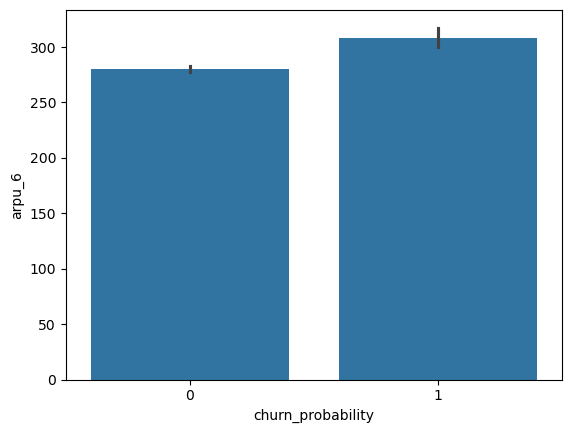

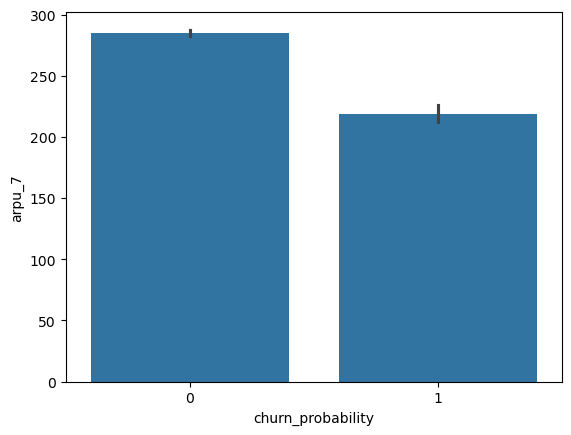

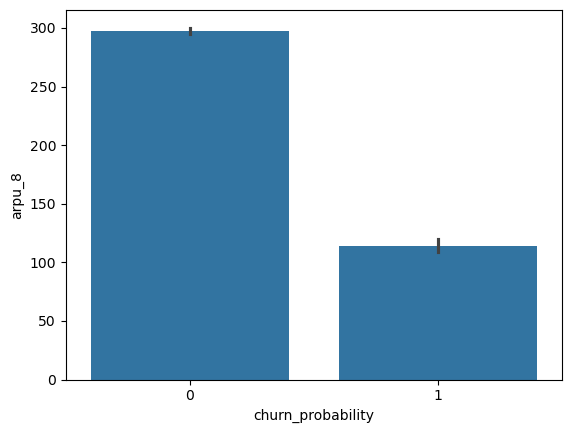

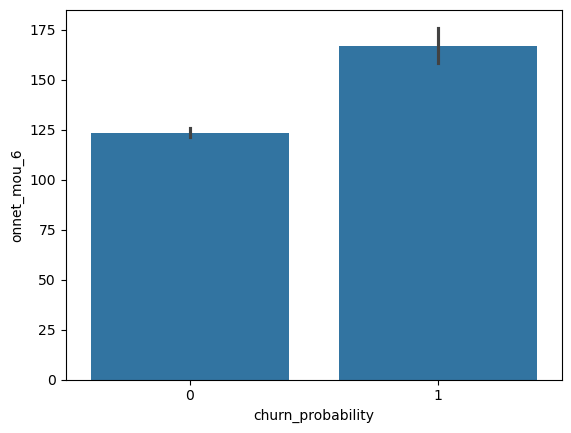

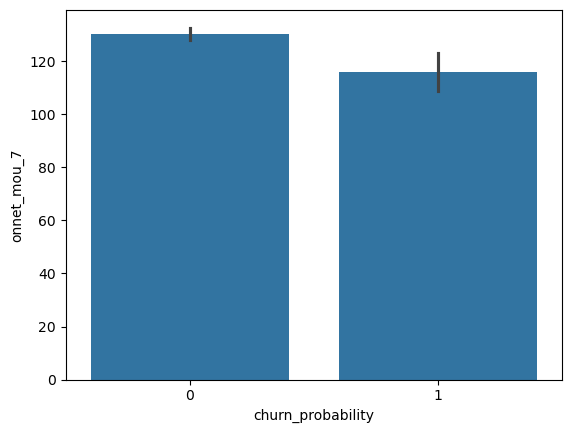

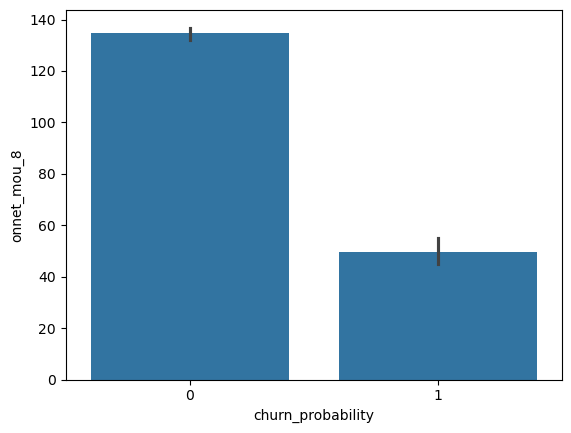

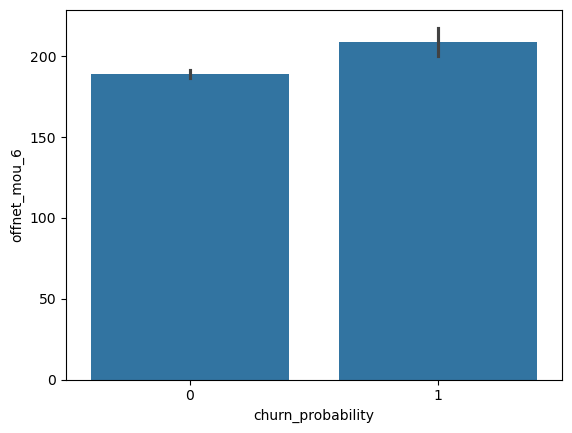

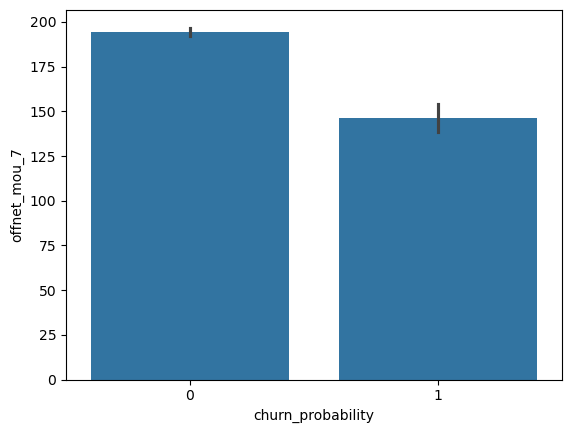

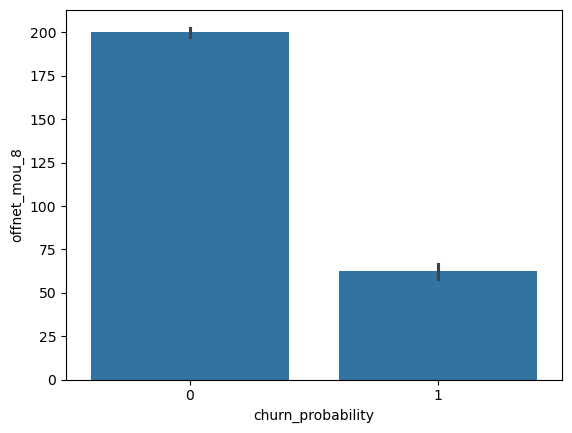

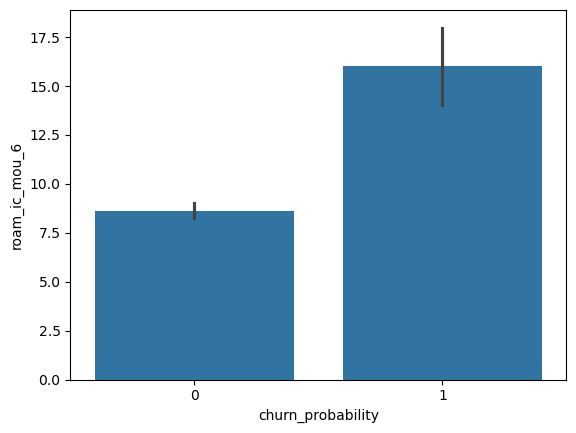

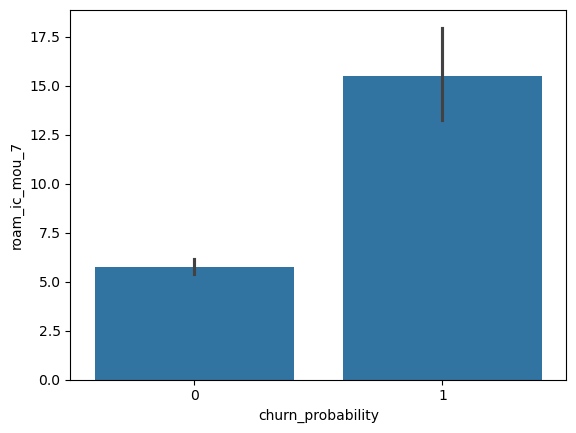

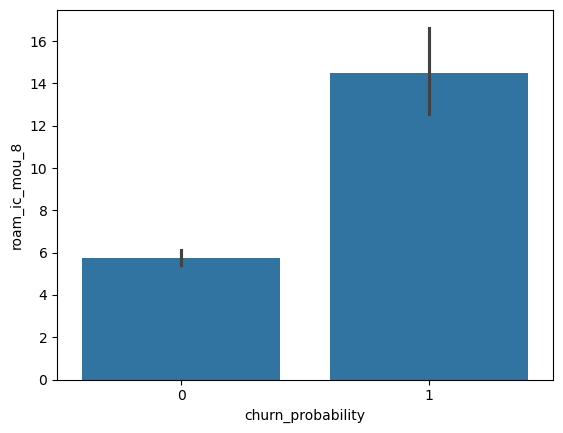

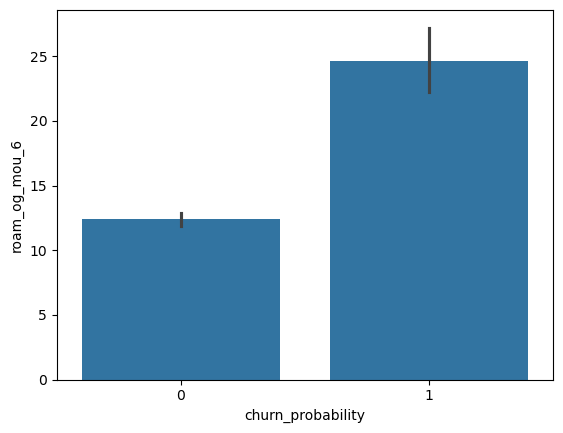

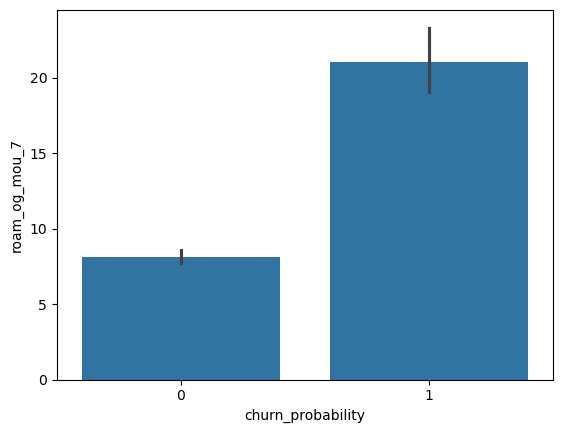

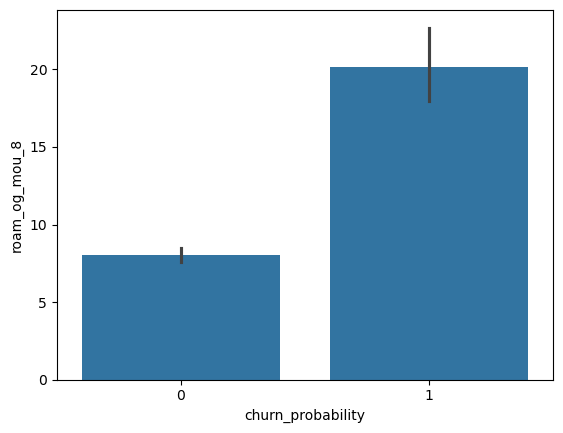

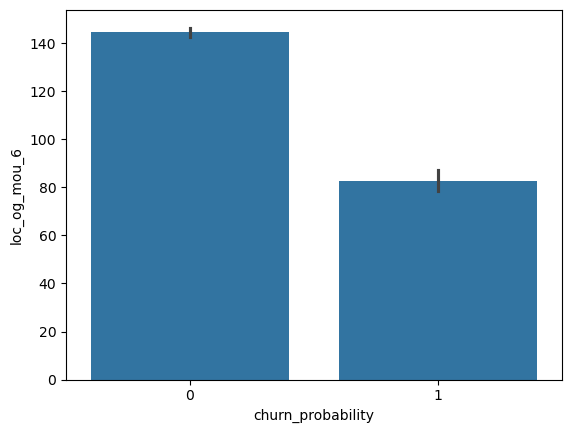

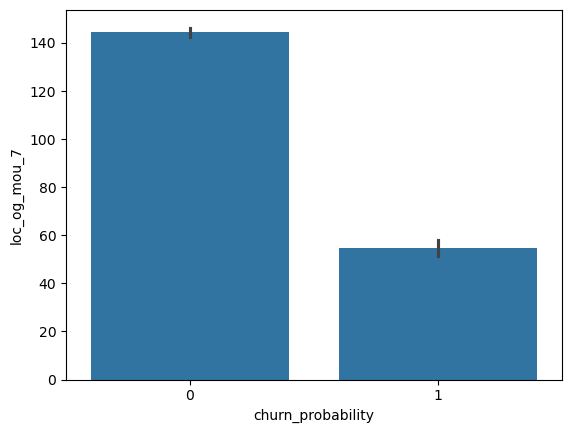

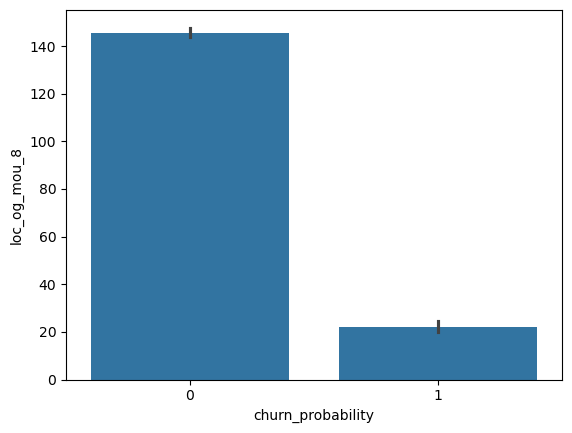

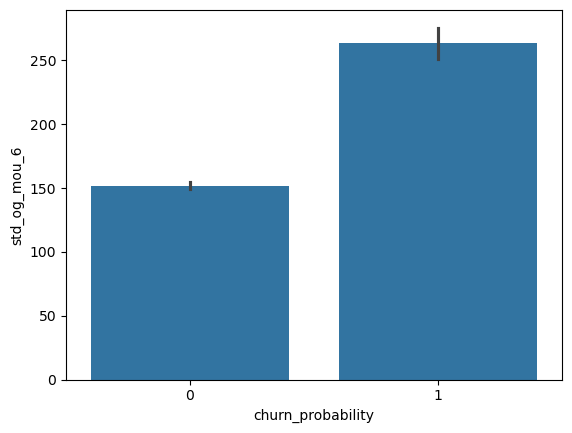

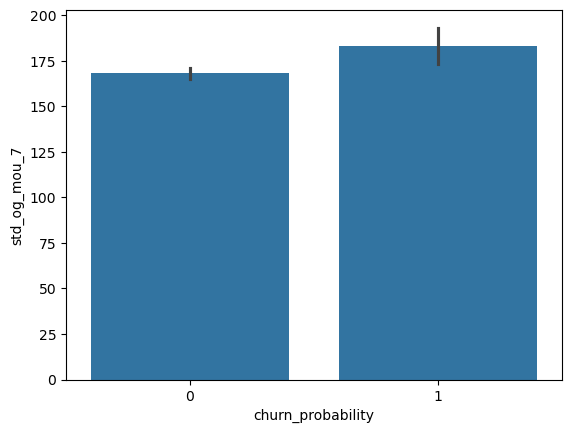

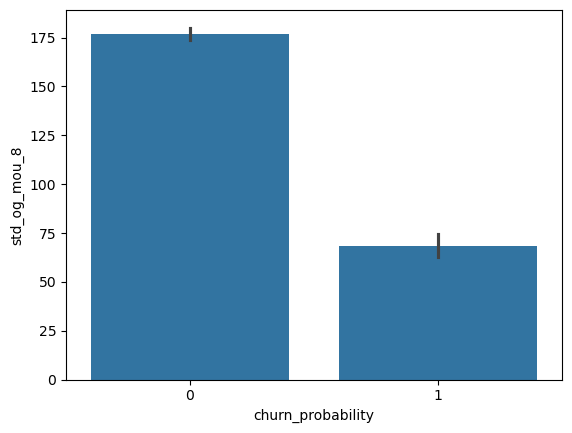

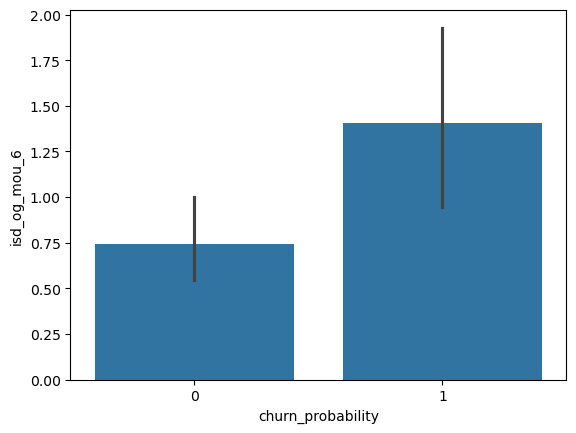

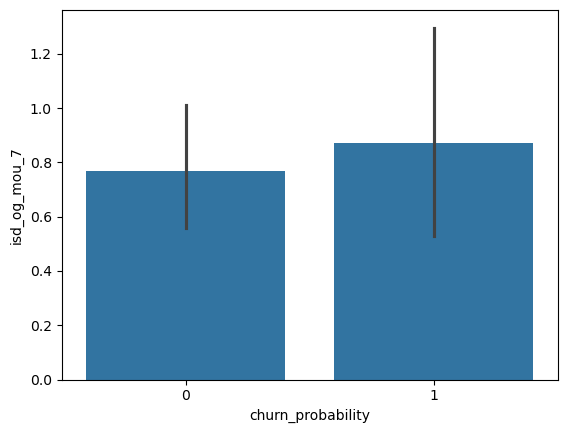

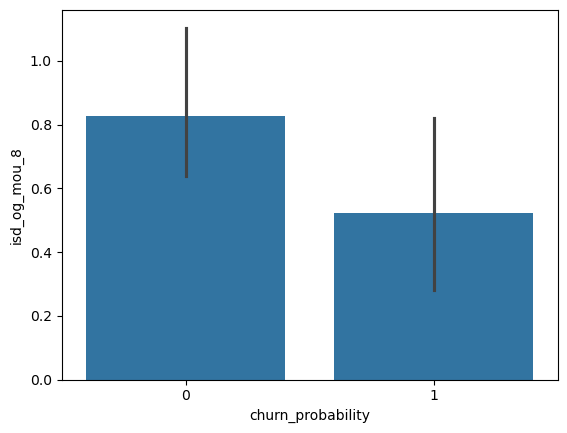

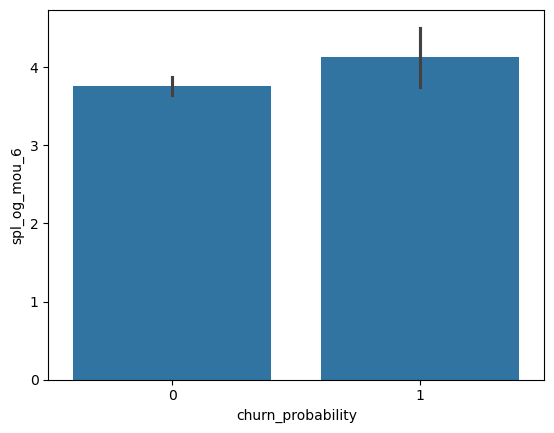

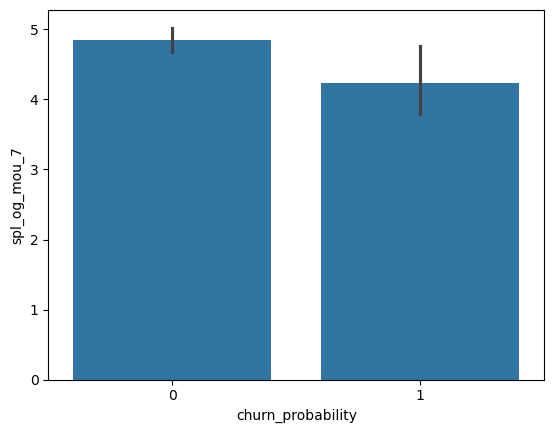

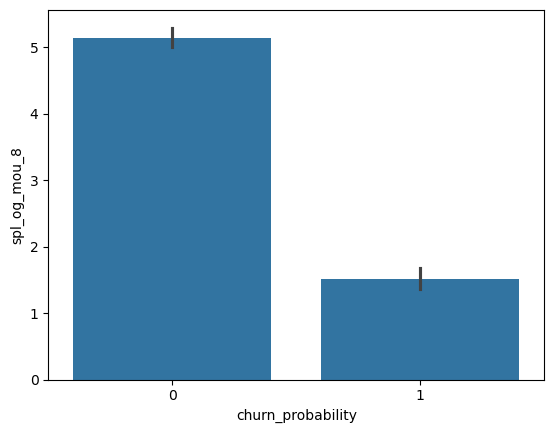

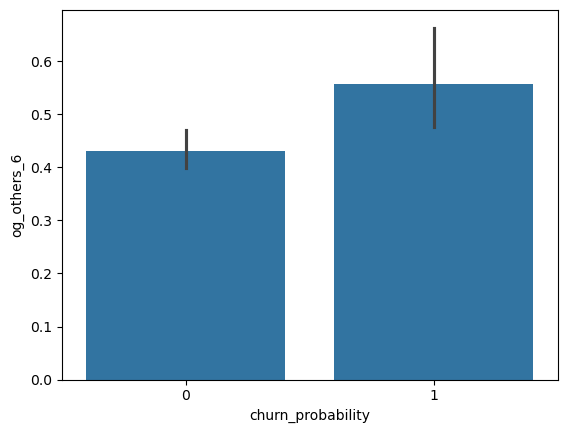

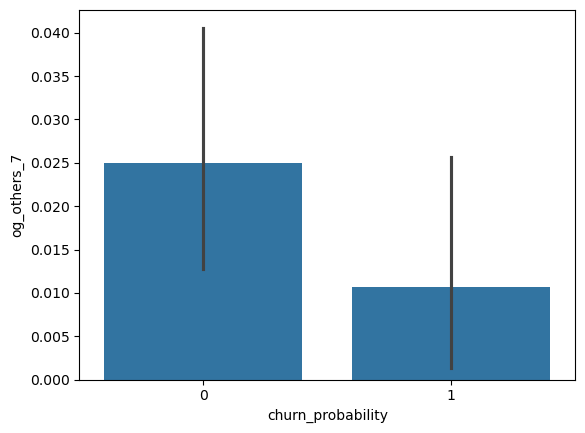

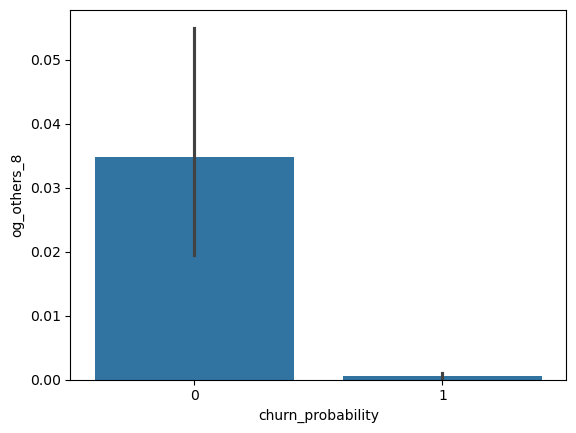

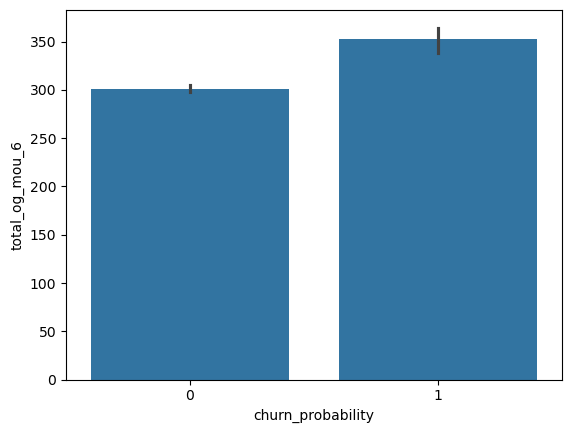

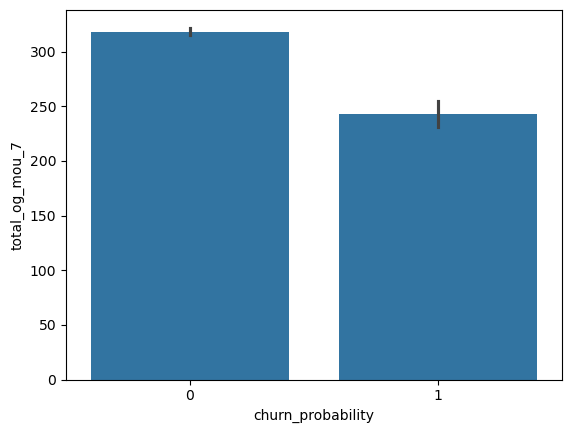

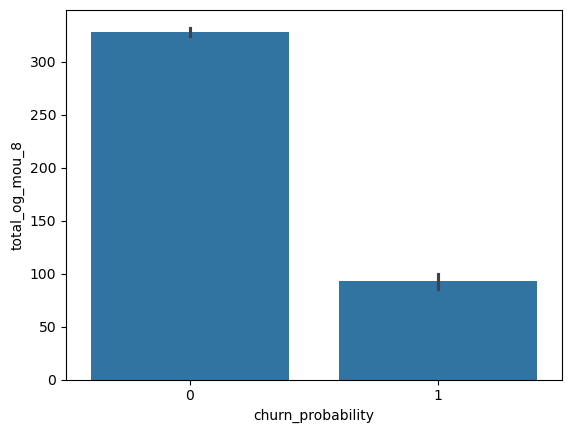

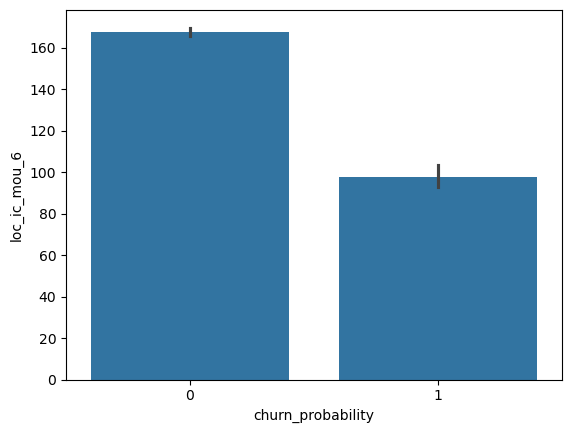

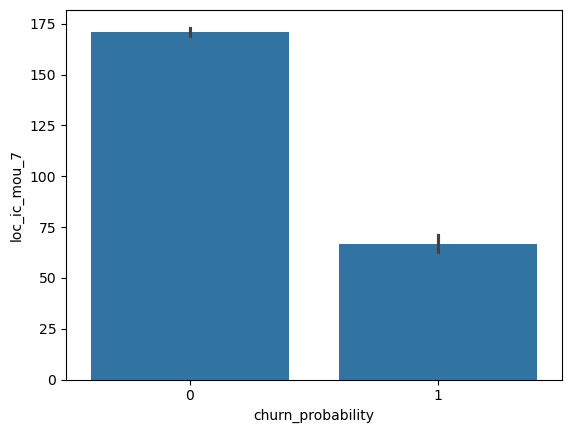

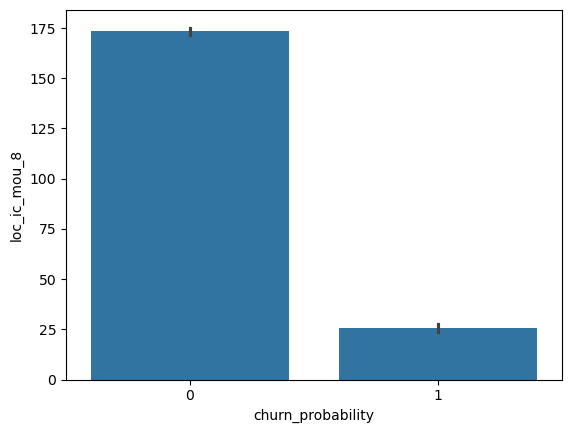

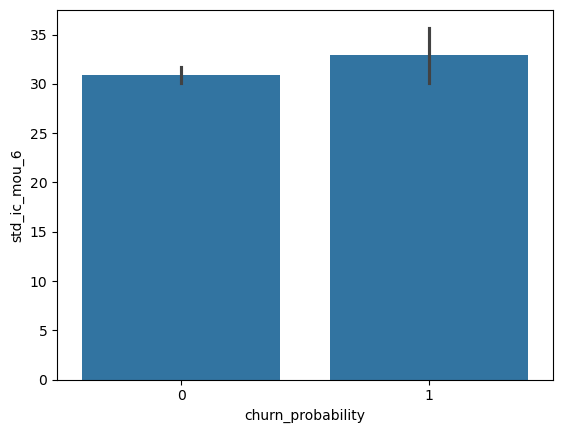

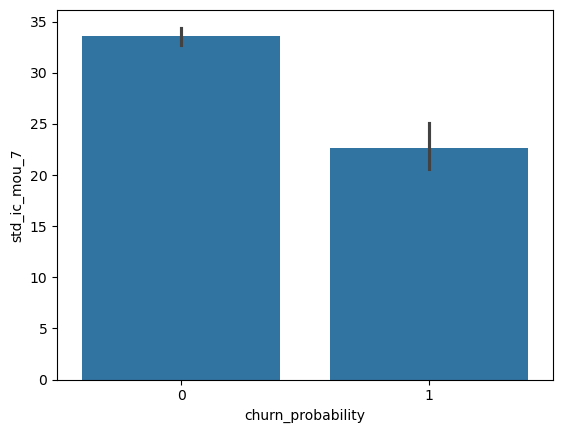

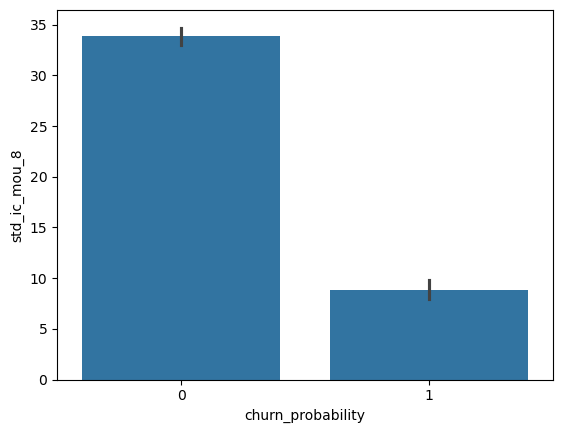

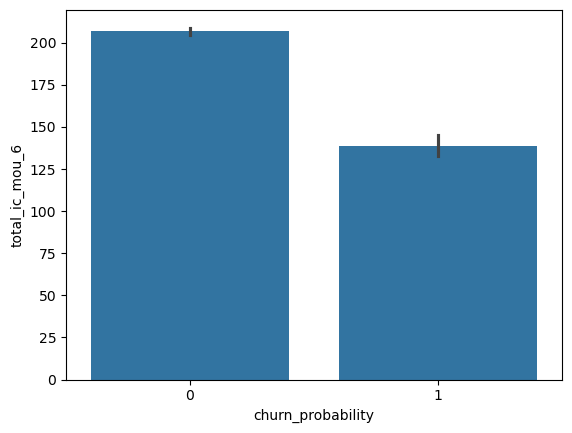

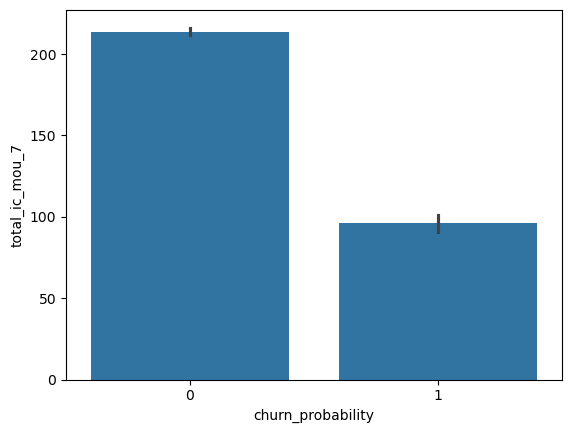

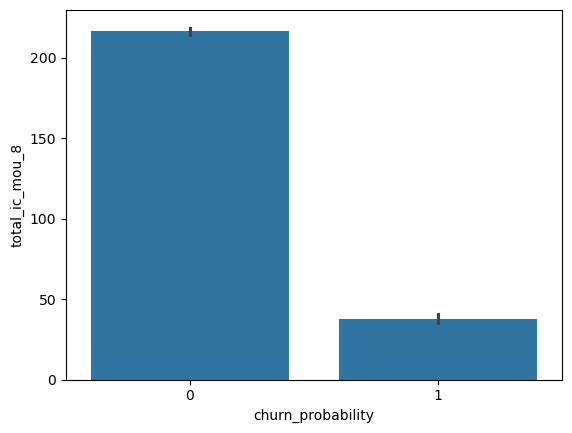

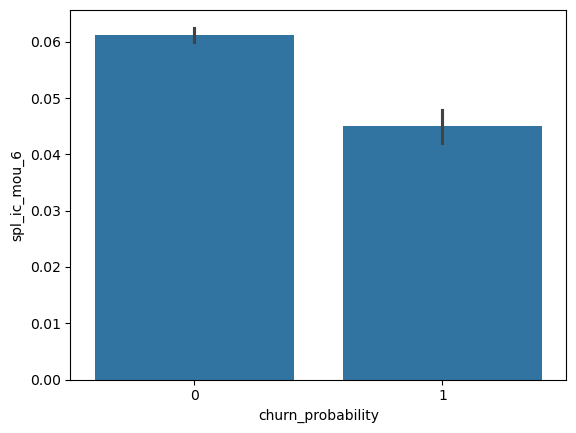

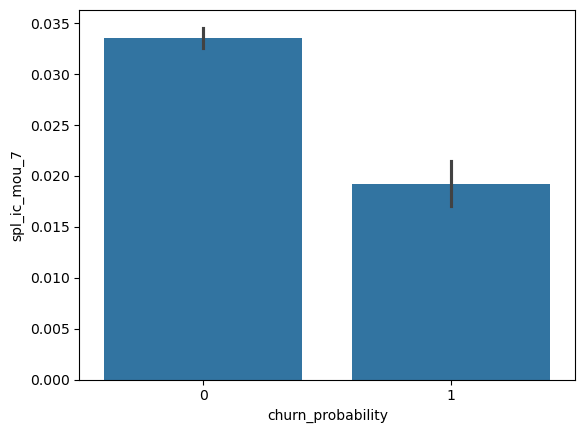

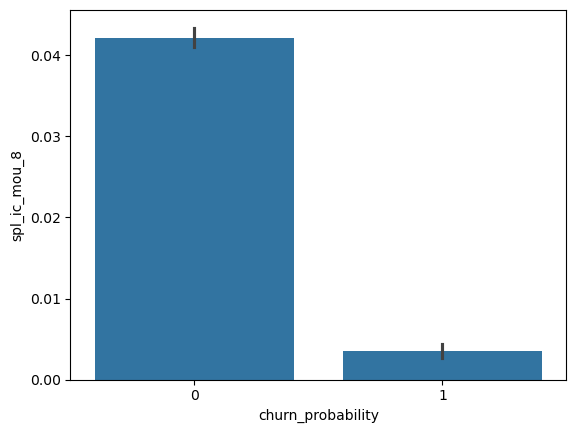

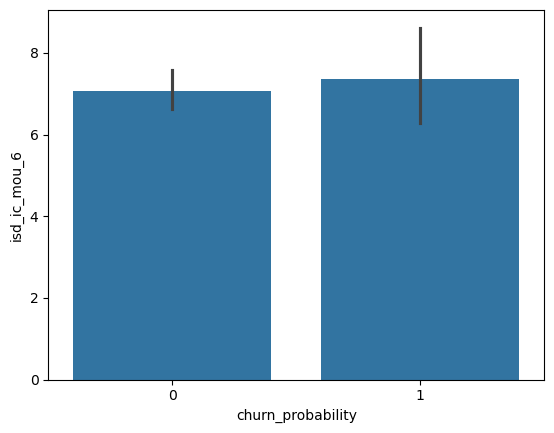

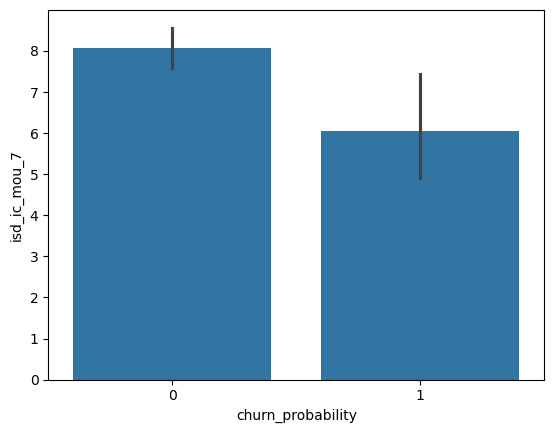

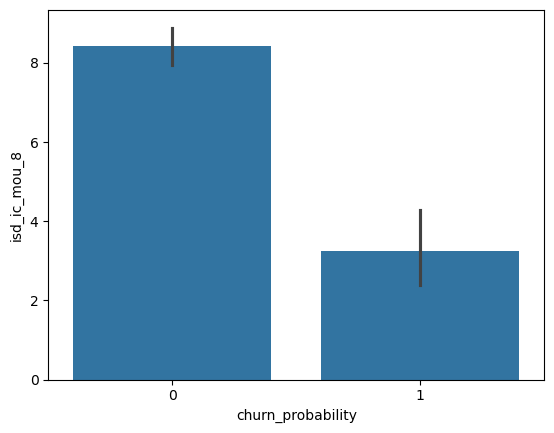

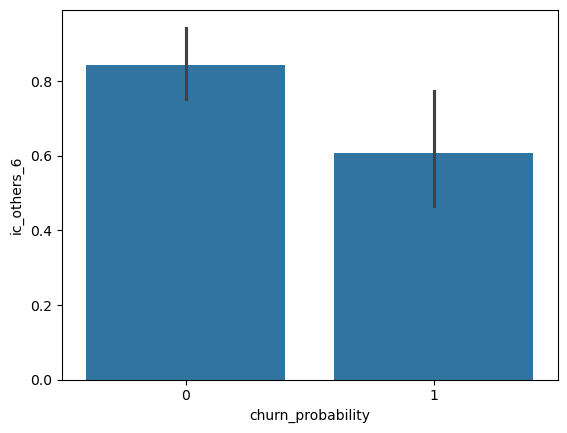

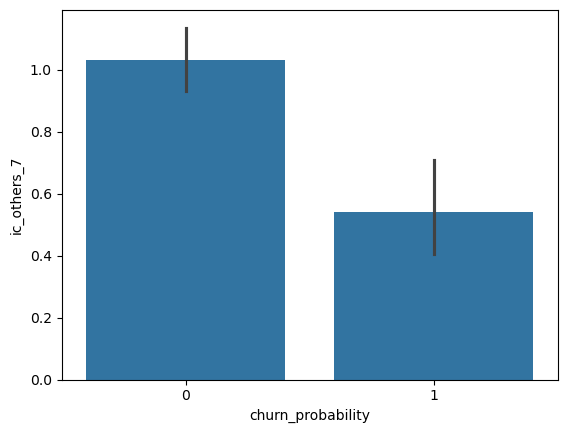

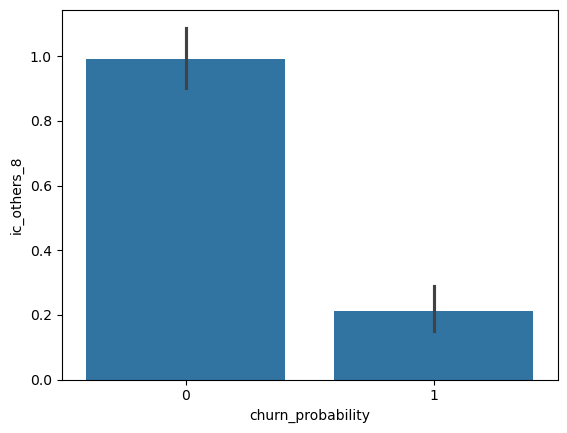

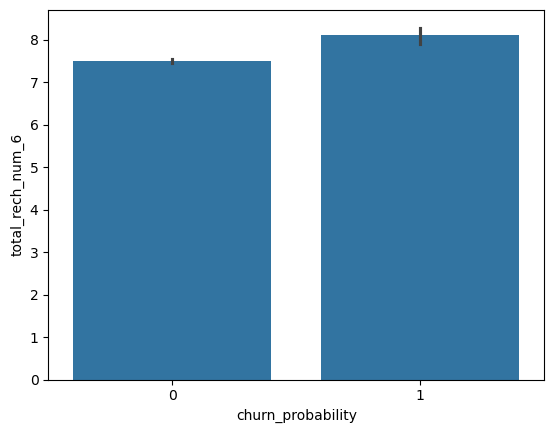

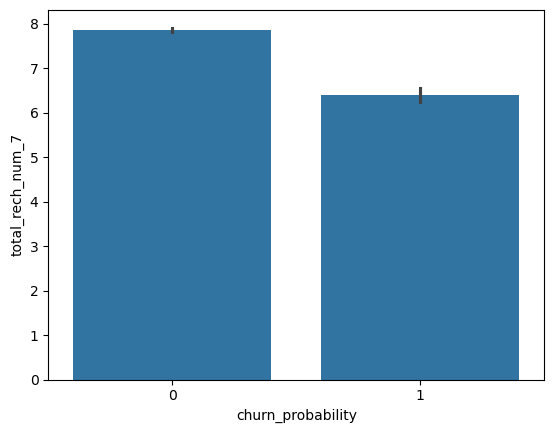

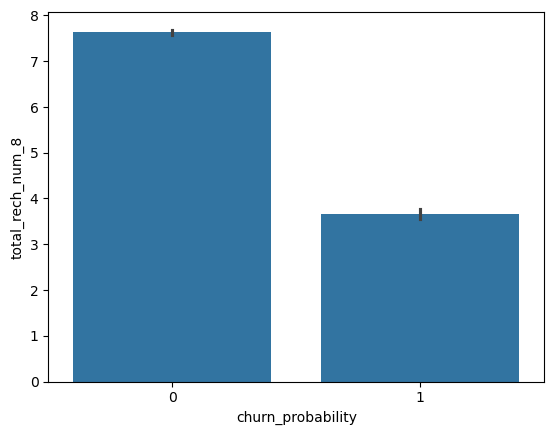

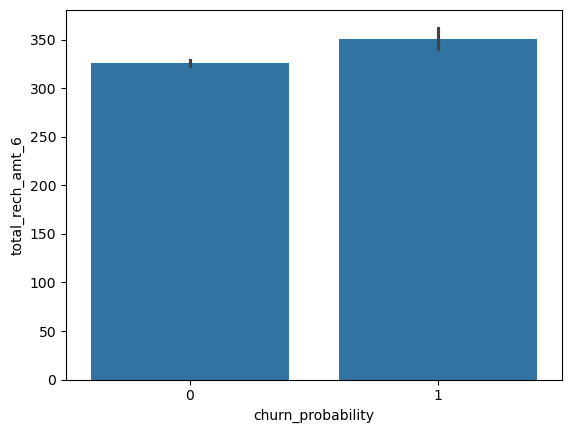

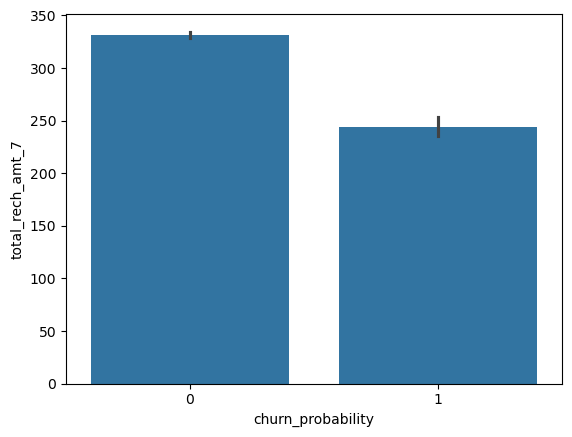

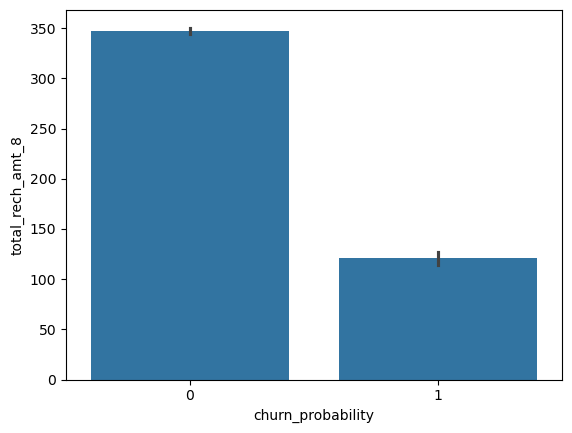

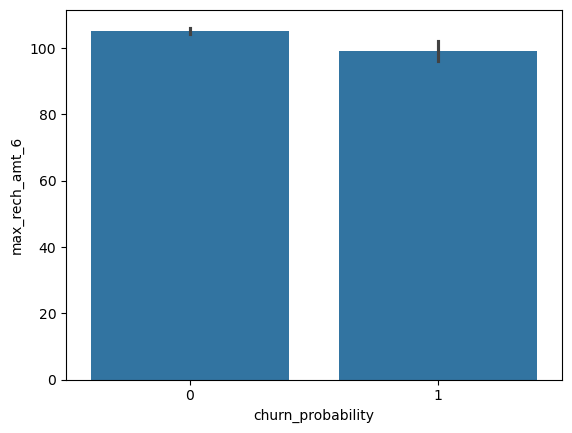

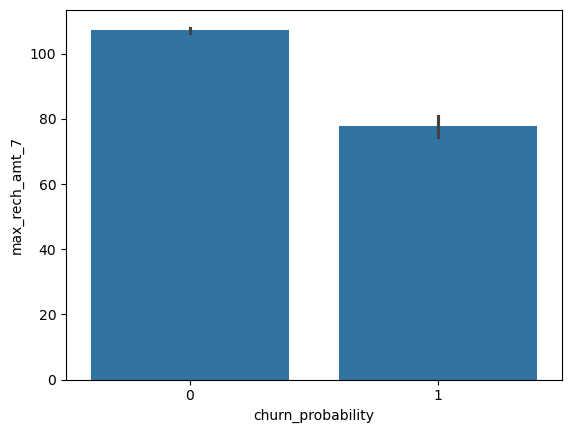

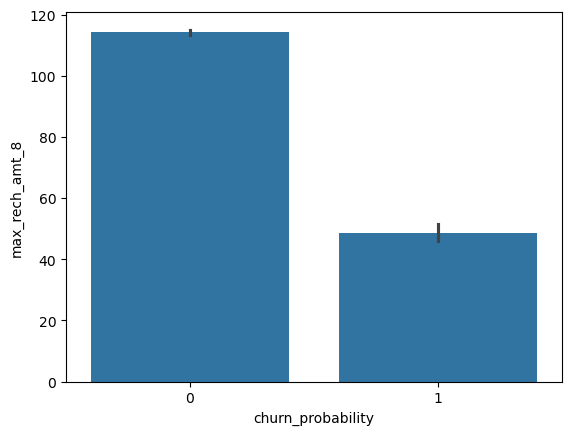

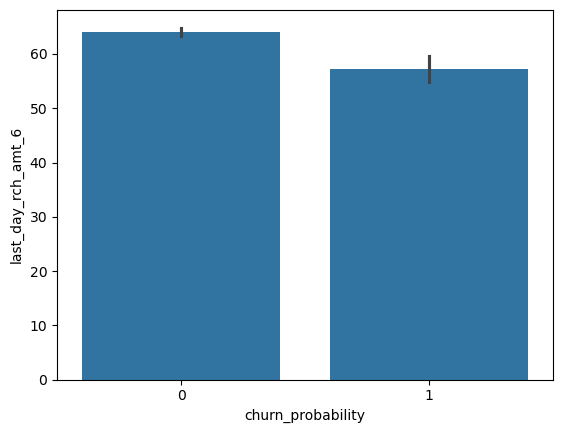

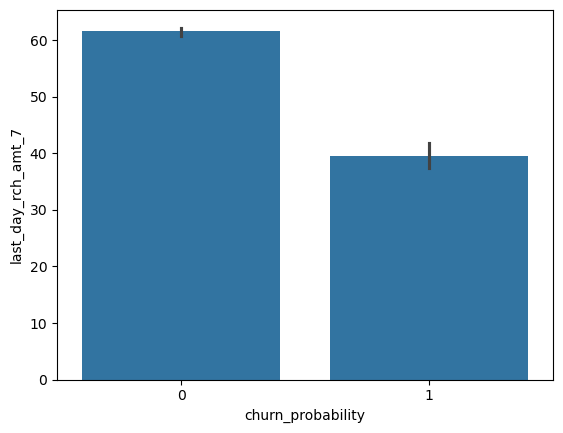

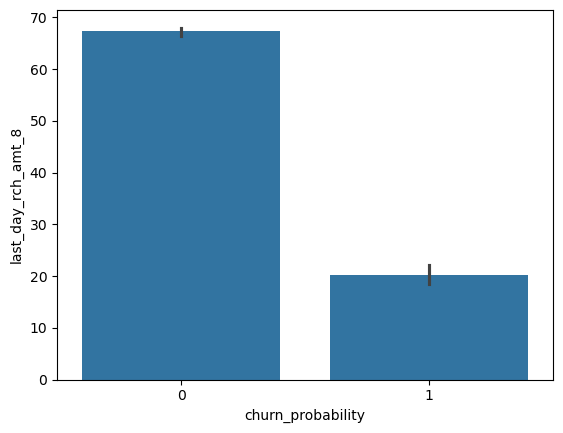

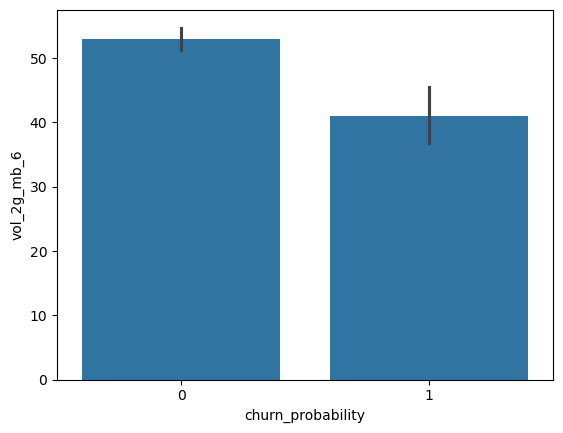

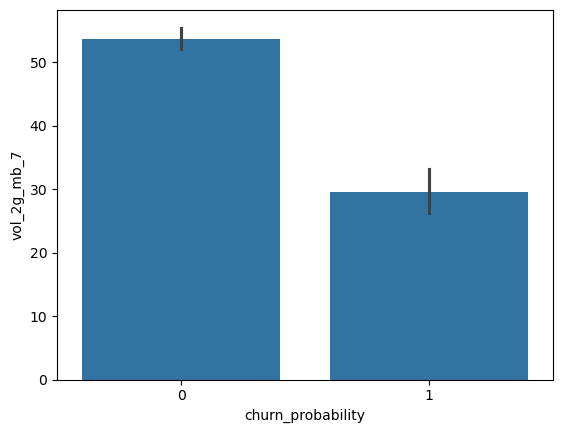

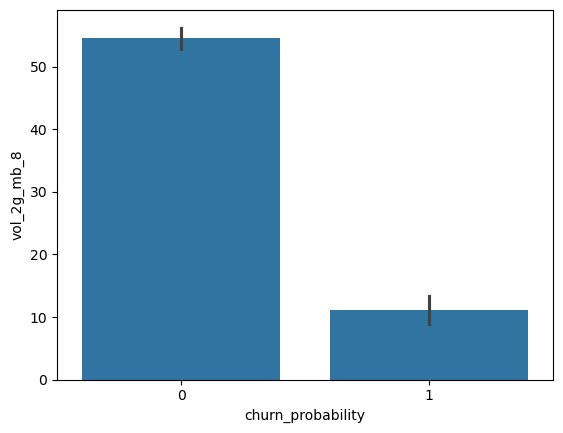

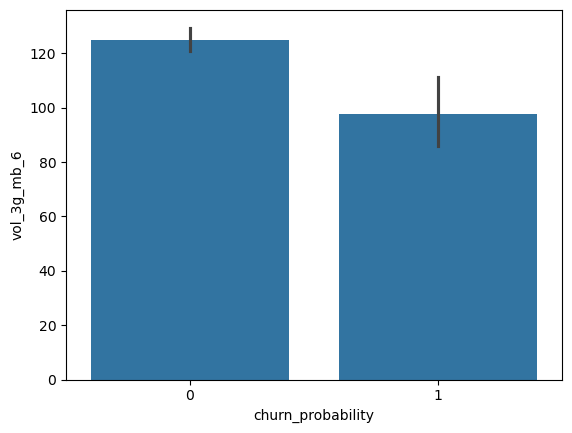

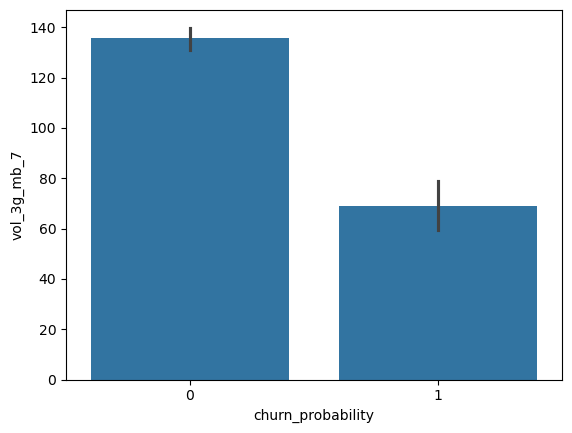

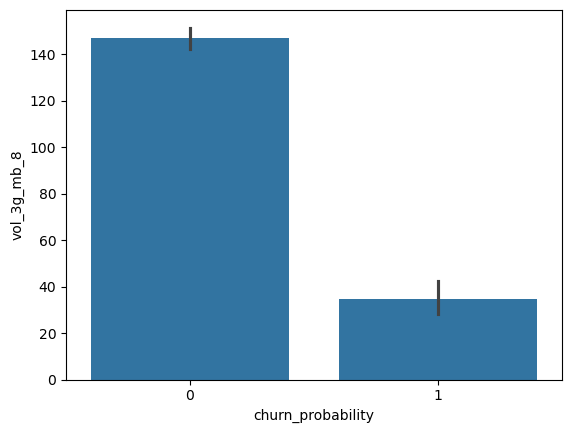

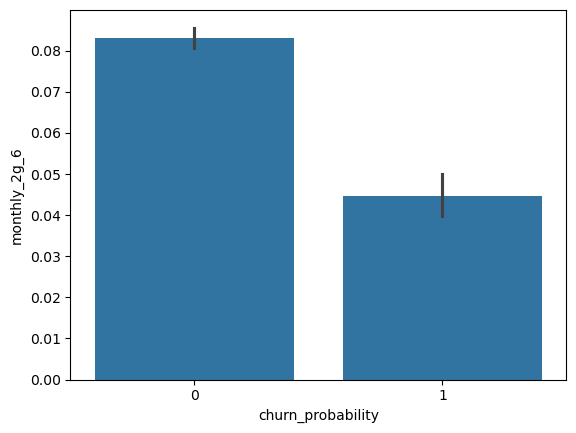

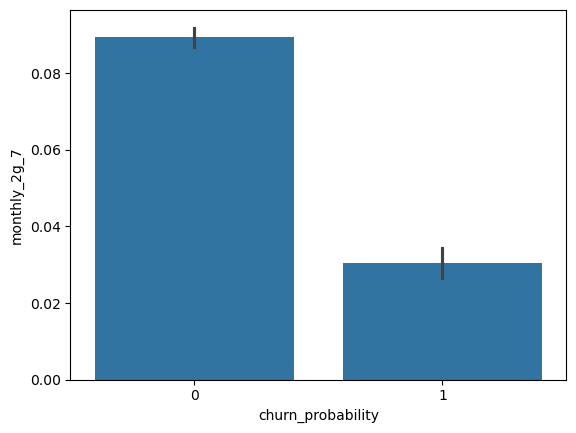

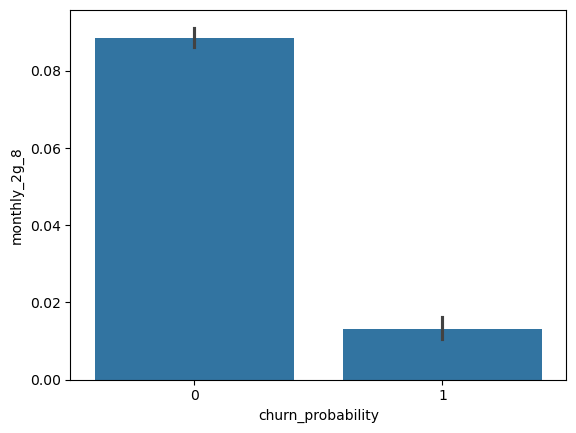

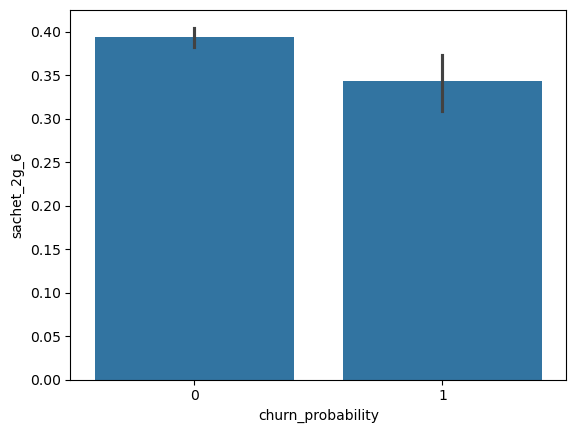

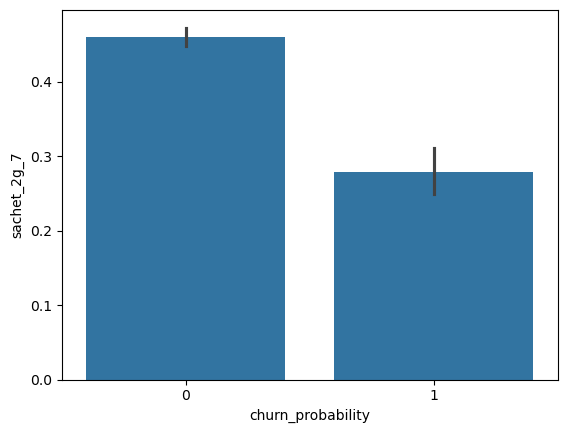

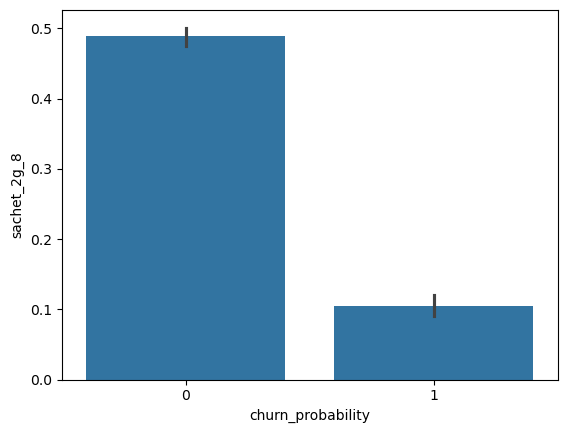

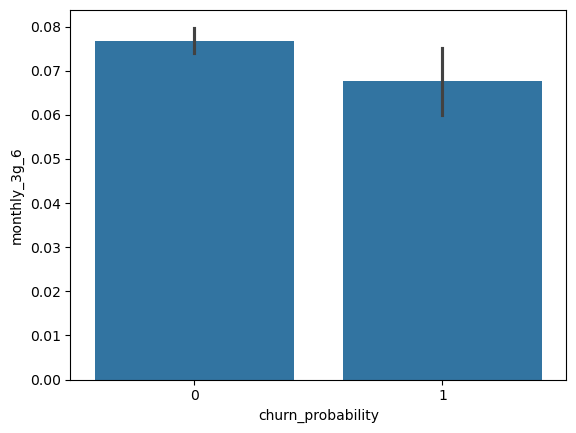

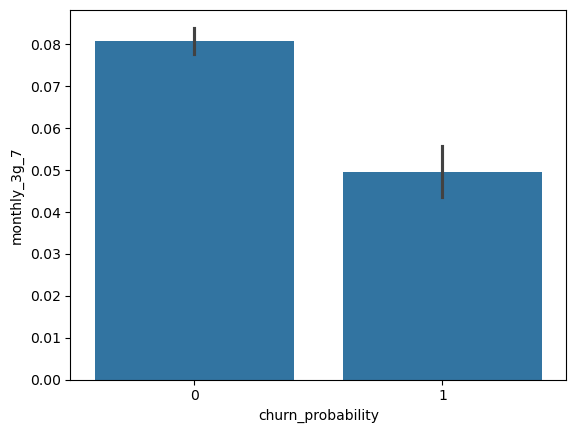

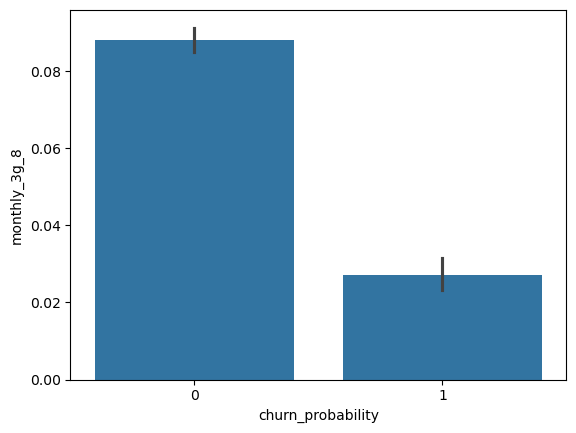

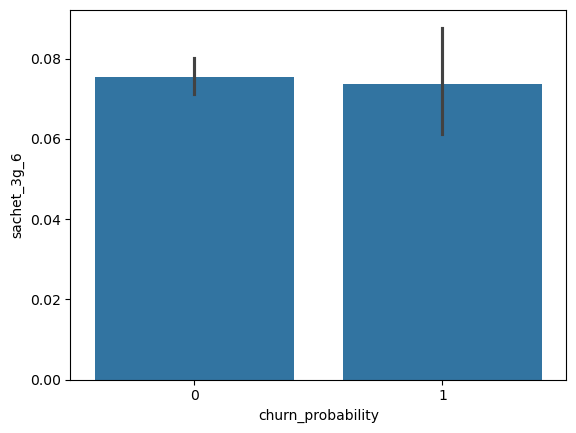

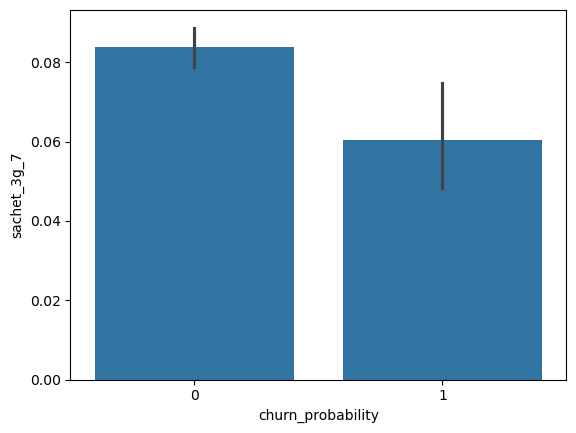

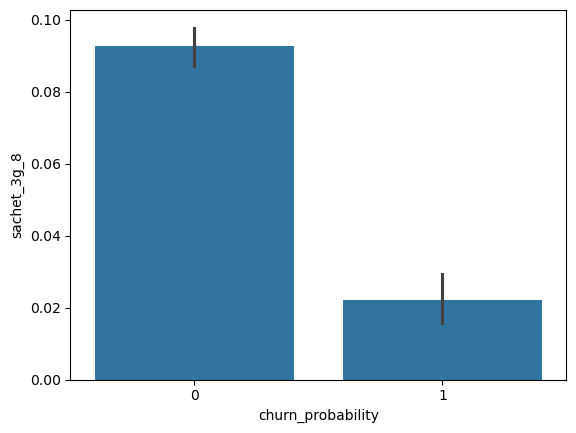

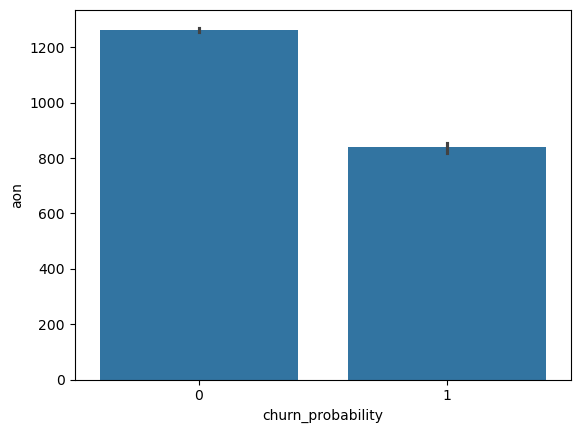

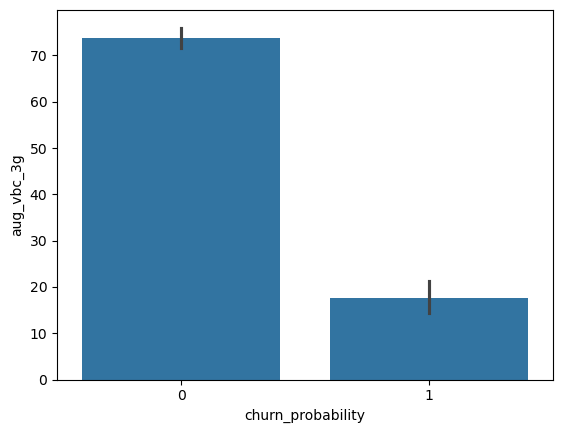

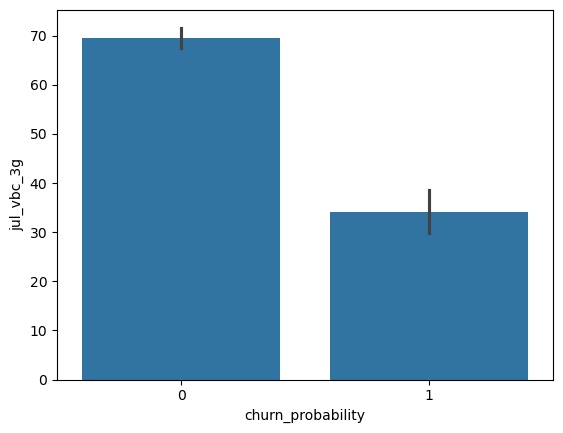

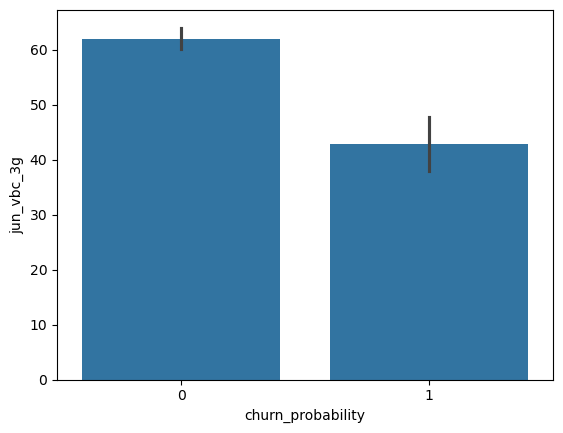

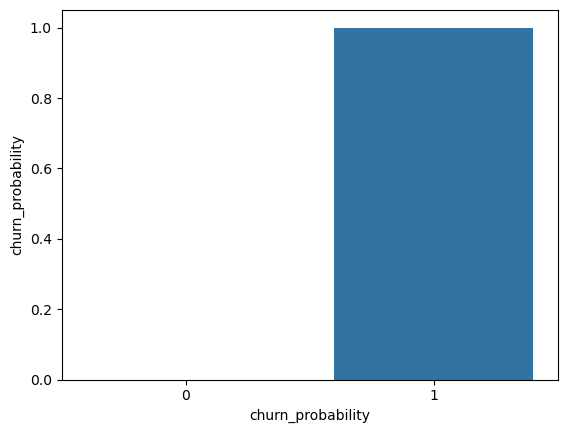

In [16]:
# Analysing trends in data using churn_probability vs other variables


for i in train_data.columns :
    sns.barplot(data=train_data, x='churn_probability', y=i)
    plt.show()

In [15]:
# Checking correlation between variables
train_data.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
arpu_6,1.000000,0.743730,0.643193,0.450632,0.324784,0.259506,0.616059,0.455762,0.358563,0.132511,0.089524,0.086243,0.235952,0.172643,0.140823,0.431472,0.359189,0.315364,0.490014,0.337046,0.243462,0.414701,0.383877,0.368865,0.124931,0.069070,0.057522,0.049298,0.005663,0.003963,0.667009,0.491677,0.387790,0.236366,0.193148,0.169245,0.147566,0.104563,0.085578,0.274957,0.217625,0.188489,0.038266,-0.079633,-0.051399,0.089464,0.061507,0.058208,0.023386,0.030721,0.015664,0.503610,0.289559,0.198571,0.952776,0.726028,0.626760,0.449690,0.372918,0.323384,0.350010,0.309450,0.220152,0.089947,0.052497,0.038079,0.249904,0.200779,0.190453,0.101695,0.058688,0.047390,0.049431,0.026238,0.029319,0.261292,0.186164,0.179641,0.085993,0.066930,0.050399,0.025875,0.168365,0.184225,0.217785,0.025351
arpu_7,0.743730,1.000000,0.782332,0.321251,0.431210,0.343558,0.466002,0.600463,0.468836,0.098842,0.100561,0.093823,0.169041,0.208508,0.166858,0.326868,0.419849,0.351279,0.350795,0.485500,0.365633,0.382435,0.445676,0.404003,0.086171,0.108407,0.088985,0.024534,0.009066,0.007470,0.492247,0.652750,0.511814,0.168950,0.220506,0.193863,0.108491,0.139840,0.121231,0.197124,0.256449,0.223863,0.012360,-0.050350,-0.034948,0.061417,0.071956,0.063291,0.018062,0.032396,0.021704,0.334458,0.453908,0.309685,0.751131,0.955298,0.767195,0.375192,0.488844,0.405791,0.329590,0.400732,0.273247,0.058506,0.091960,0.061617,0.185759,0.270625,0.217570,0.059918,0.106007,0.059303,0.023609,0.058365,0.044841,0.193652,0.274479,0.204451,0.061984,0.094972,0.065798,0.023818,0.189943,0.218318,0.171154,-0.057809
arpu_8,0.643193,0.782332,1.000000,0.241236,0.327209,0.424127,0.369390,0.471039,0.596954,0.086138,0.080138,0.107834,0.152164,0.163597,0.210659,0.284257,0.345230,0.418687,0.242548,0.357159,0.479150,0.367724,0.408140,0.421977,0.096902,0.106482,0.129847,0.018258,0.002597,0.017394,0.379189,0.504649,0.643771,0.142310,0.181781,0.230178,0.083424,0.109353,0.147730,0.165257,0.211170,0.269600,0.002464,-0.051440,-0.004494,0.061448,0.067092,0.085968,0.016001,0.035140,0.027959,0.245588,0.329852,0.448094,0.638997,0.778810,0.958333,0.322303,0.409576,0.494623,0.269285,0.371157,0.347832,0.044819,0.060259,0.093289,0.163538,0.200398,0.270242,0.057779,0.070582,0.109078,0.009912,0.031570,0.069048,0.167197,0.198271,0.278965,0.051960,0.069332,0.099576,0.033256,0.224868,0.177637,0.157545,-0.157566
onnet_mou_6,0.450632,0.321251,0.241236,1.000000,0.733298,0.595747,0.204116,0.146268,0.114708,0.046785,0.044693,0.055267,0.116909,0.111266,0.093622,0.384061,0.309549,0.265957,0.658740,0.468942,0.367779,-0.002294,-0.003667,-0.003325,0.090437,0.062865,0.065519,0.035936,-0.000243,0.000125,0.754065,0.553898,0.445221,0.087101,0.065023,0.049582,0.092953,0.058754,0.044396,0.108195,0.077150,0.057636,0.038079,-0.057407,-0.031811,0.001401,-0.001905,-0.004447,0.002093,0.004763,0.002394,0.353060,0.215415,0.154741,0.44542

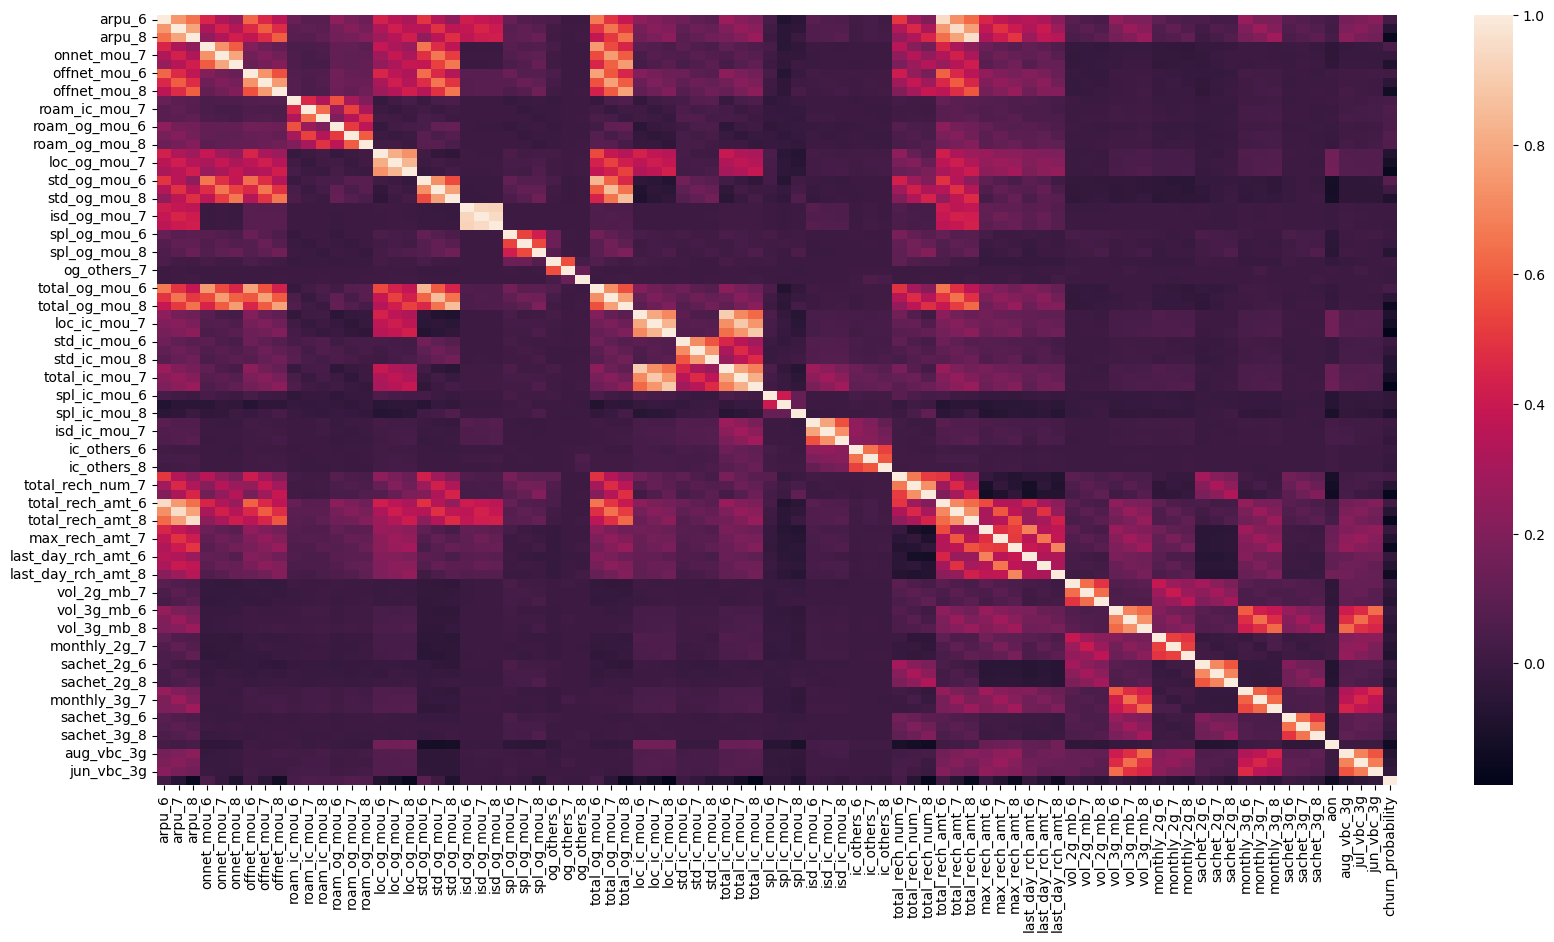

In [46]:
# Checking correlation between variables

plt.figure(figsize = (20,10))   
sns.heatmap(train_data.corr(),annot = False)
plt.show()

# Splitting data in train and test data

In [102]:
# Checking class imbalance

train_data['churn_probability'].value_counts()

churn_probability
0    62867
1     7132
Name: count, dtype: int64

In [103]:
# Splitting data in X and y variables

X=train_data.drop(columns=["churn_probability"])
y=train_data["churn_probability"]
X.shape, y.shape

((69999, 85), (69999,))

In [104]:
# Splitting data is train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48999, 85), (21000, 85), (48999,), (21000,))

# Standardising and dimensionality reduction

In [105]:
# Standardising data

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test_scaled[X_test.columns] = scaler.transform(X_test[X_test.columns])


In [106]:
# PCA for dimensionality reduction

pca= PCA(0.9, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca.shape, X_test_pca.shape

((48999, 40), (21000, 40))

# Model building

In [107]:
# Model building using XGBClassifier algorithm

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42,
                              n_estimators= 50, max_depth= 5, 
                              learning_rate= 0.2, gamma= 1.5)
xgb_model.fit(X_train_scaled, y_train)

# Predict on validation set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy, precision, recall
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)

Accuracy :  0.9423333333333334
Precision :  0.7518676627534685
Recall :  0.6538283062645012


In [25]:
# XGBClassifier algorithm HyperParameter Tunning

xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

params = {
        'n_estimators' : [10, 20, 50, 100], 
        'learning_rate' : [0.1, 0.2, 0.5, 1], 
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'max_depth': [3, 5, 10, 20,50]
        }

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=5, verbose=1, random_state=42)
random_search.fit(X_train_scaled, y_train)


print('Best estimator : ',random_search.best_estimator_)
print('\n Best accuracy : ', random_search.best_score_ )
print('\n Best hyperparameters : ',random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best estimator :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

 Best accuracy :  0.9422437295767374

 Best hyperparameters :  {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 1.5}


In [108]:
# Getting column importance from XGBClassifier

feature_imp_df= pd.DataFrame()
feature_imp_df['column_name'] = X.columns.values
feature_imp_df['column_importance'] = 100*xgb_model.feature_importances_
feature_imp_df

,column_name,column_importance
0,arpu_6,0.308588
1,arpu_7,0.525964
2,arpu_8,2.432483
3,onnet_mou_6,0.419292
4,onnet_mou_7,0.295296
5,onnet_mou_8,0.465946
6,offnet_mou_6,0.488990
7,offnet_mou_7,0.355773
8,offnet_mou_8,0.824823
9,roam_ic_mou_6,0.185012


In [109]:
# Top 10 features in descending order

feature_imp_df_sort = feature_imp_df.sort_values('column_importance', ascending=False).head(10)
feature_imp_df_sort

,column_name,column_importance
41,total_ic_mou_8,33.795502
35,loc_ic_mou_8,17.639870
14,roam_og_mou_8,3.071512
2,arpu_8,2.432483
62,last_day_rch_amt_8,1.935765
32,total_og_mou_8,1.586918
44,spl_ic_mou_8,1.520536
65,vol_2g_mb_8,1.494579
68,vol_3g_mb_8,1.487225
56,total_rech_amt_8,1.315165


# Top 10 features according to xgbclassifier algorithm
####   total_ic_mou_8, 
####   loc_ic_mou_8, 
####   roam_og_mou_8, 
####   arpu_8,
####   last_day_rch_amt_8,
####   total_og_mou_8, 
####   spl_ic_mou_8,
####   vol_2g_mb_8, 
####   vol_3g_mb_8, 
####   total_rech_amt_8

# Getting the prediction from Test dataset

In [110]:
unseen_df = pd.read_csv("test.csv")

In [111]:
# Extracting the required columns from dataset

unseen_data= unseen_df[X.columns]
unseen_data.shape

(30000, 85)

In [112]:
# Checking null values

100*unseen_data.isnull().mean()

arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.896667
onnet_mou_7           3.906667
onnet_mou_8           5.583333
offnet_mou_6          3.896667
offnet_mou_7          3.906667
offnet_mou_8          5.583333
roam_ic_mou_6         3.896667
roam_ic_mou_7         3.906667
roam_ic_mou_8         5.583333
roam_og_mou_6         3.896667
roam_og_mou_7         3.906667
roam_og_mou_8         5.583333
loc_og_mou_6          3.896667
loc_og_mou_7          3.906667
loc_og_mou_8          5.583333
std_og_mou_6          3.896667
std_og_mou_7          3.906667
std_og_mou_8          5.583333
isd_og_mou_6          3.896667
isd_og_mou_7          3.906667
isd_og_mou_8          5.583333
spl_og_mou_6          3.896667
spl_og_mou_7          3.906667
spl_og_mou_8          5.583333
og_others_6           3.896667
og_others_7           3.906667
og_others_8           5.583333
total_og_mou_6        0.000000
total_og_mou_7        0.000000
total_og

In [113]:
# Replacing nan with zero

unseen_data.fillna(0,inplace=True)

In [114]:
# Standardising the data
unseen_scaled = unseen_data.copy()
unseen_scaled[unseen_data.columns] = scaler.transform(unseen_data[unseen_data.columns])

In [115]:
# Predicting result for test data set

output_df=unseen_df.copy()
output_df['churn_probability'] = xgb_model.predict(unseen_scaled)
output = output_df[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [116]:
# Value counts of output result

output['churn_probability'].value_counts()

churn_probability
0    27354
1     2646
Name: count, dtype: int64

In [117]:
# Exporting output result in sample.csv file

output.to_csv('my_sample.csv',index=False)